In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data 
data= pd.read_csv('/Users/vadimbenichou/Desktop/EcoVadis/Churn_Modelling.csv','rb',delimiter=',')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#We can delete this column, it's the same than the index
data.drop(['RowNumber'], inplace = True, axis=1)

In [5]:
#Also the Surname is an unusable variable and we already have the customer id to asign each customer, hence we can delete it
data.drop(['Surname'], inplace = True, axis=1)

In [6]:
# First preview of the descriptive statistics 
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [8]:
# Any Missing Values 
pd.isnull(data).sum() 

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We don't have any Missing Value, we will check if there are any weird,inadequate values 

In [9]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


7963
2037


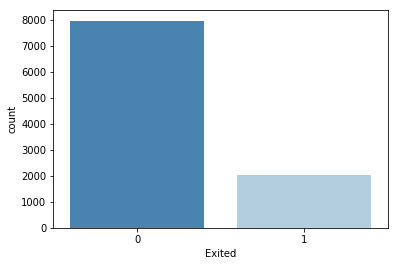

In [10]:
# Visualization of the Exited customers (=1) ~20%
sns.countplot(data['Exited'],palette="Blues_r")
print(data[data['Exited'] == 0]['Exited'].count())
print(data[data['Exited']== 1]['Exited'].count())

In [11]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

# Data Engineering 

In [12]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### CreditScore
Categorical variable : According studies of the value of the Credit score, we assume that: <br>
Poor: < 580 <br>
Fair: [580,660[ <br>
Good: [660,730[  <br>
Very good: [730,790]  <br>
Exceptional: >790

In [13]:
data['CreditScore']=[0 if element <580
                            else 1 if element >=580 and element <660
                            else 2 if element >=660 and element <730
                            else 3 if element >=730 and element <790
                            else 4
                            for element in data['CreditScore']]

### Geography 
We make dummy variable for each country

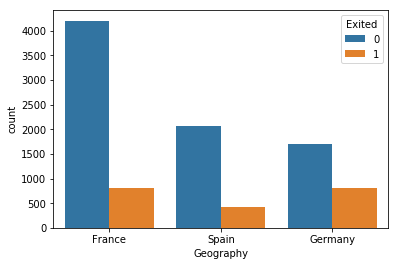

In [14]:
# Customers according their country 
sns.countplot(data['Geography'],hue=data['Exited'])

In [15]:
data.groupby(['Geography','Exited']).count()

CustomerId  CreditScore  Gender   Age  Tenure  Balance  \
Geography Exited                                                           
France    0             4204         4204    4204  4204    4204     4204   
          1              810          810     810   810     810      810   
Germany   0             1695         1695    1695  1695    1695     1695   
          1              814          814     814   814     814      814   
Spain     0             2064         2064    2064  2064    2064     2064   
          1              413          413     413   413     413      413   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
Geography Exited                                                             
France    0                4204       4204            4204             4204  
          1                 810        810             810              810  
Germany   0                1695       1695            1695             1695  
          1                 814        814             814              814  
Spain     0                2064       2064            2064             2064  
          1                 413        413             413              413

In [16]:
print("Percentage that leave for France {}.".format(810/4204))
print("Percentage that leave for Germany {}.".format(814/1695))
print("Percentage that leave for Spain {}.".format(413/2064))

Percentage that leave for France 0.19267364414843008.
Percentage that leave for Germany 0.48023598820059.
Percentage that leave for Spain 0.2000968992248062.


In [17]:
data['FromFrance']=[1 if element == 'France'
                  else 0 
                  for element in data['Geography']]

In [18]:
data['FromGermany']=[1 if element == 'Germany'
                    else 0 
                    for element in data['Geography']]

In [19]:
data['FromSpain']=[1 if element == 'Spain'
                  else 0 
                  for element in data['Geography']]

In [20]:
data[['Geography','FromFrance','FromGermany','FromSpain']].head()

,Geography,FromFrance,FromGermany,FromSpain
0,France,1,0,0
1,Spain,0,0,1
2,France,1,0,0
3,France,1,0,0
4,Spain,0,0,1


In [21]:
data.drop(['Geography'], inplace = True, axis=1)

In [22]:
data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,FromFrance,FromGermany,FromSpain
0,15634602,1,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,1,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,0,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,2,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,4,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Gender
Categorical with 0 for Female and 1 for Male 

In [23]:
data['Gender']=[0 if element == 'Female'
               else 1
               for element in data['Gender']]

### Age
Categorical variable, because the more we getting old the more it's difficult to get a credit
<br>
0: < 30 <br>
1: [30,40[ <br>
2: [40,50[  <br>
3: [50,60]  <br>
4: >60

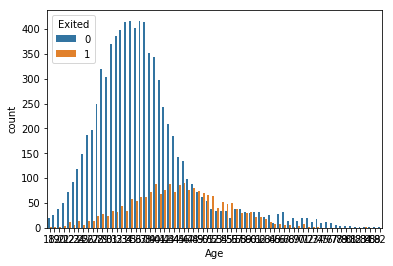

In [24]:
sns.countplot(data['Age'],hue=data['Exited'])
#We can clearly see that from a certain age (above 40), people are more tend to leave the bank 


In [25]:
data['Age']=[ 0 if element <30
                      else 1 if element >= 30 and element <40
                      else 2 if element >=40 and element < 50
                      else 3 if element >=50 and element < 60 
                      else 4
                      for element in data['Age']]

### Balance
We catagorize this variable <br>
0: = 0 <br>
1: ]0,100000[ <br>
2: [100000,140000[  <br>
3: [140000,180000]  <br>
4: > 200000

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


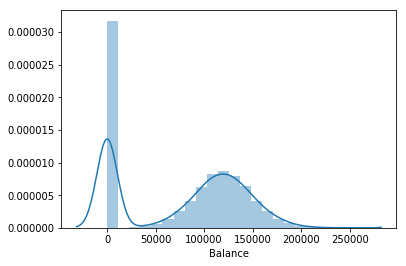

In [26]:
# Visualization of the Balance account of the customers
sns.distplot(data['Balance'])

In [27]:
data['Balance'].value_counts(bins=5)

(100359.236, 150538.854]    3828
(-250.899, 50179.618]       3692
(50179.618, 100359.236]     1533
(150538.854, 200718.472]     915
(200718.472, 250898.09]       32
Name: Balance, dtype: int64

In [28]:
data['Balance']=[ 0 if element <= 0
                      else 1 if element > 0  and element < 100000
                      else 2 if element >=100000 and element < 140000
                      else 3 if element >=140000 and element < 180000
                      else 4
                      for element in data['Balance']]

In [29]:
data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,FromFrance,FromGermany,FromSpain
0,15634602,1,0,2,2,0,1,1,1,101348.88,1,1,0,0
1,15647311,1,0,2,1,1,1,0,1,112542.58,0,0,0,1
2,15619304,0,0,2,8,3,3,1,0,113931.57,1,1,0,0
3,15701354,2,0,1,1,0,2,0,0,93826.63,0,1,0,0
4,15737888,4,0,2,2,2,1,1,1,79084.10,0,0,0,1


### EstimatedSalary
Categorical variable:<br>
0: = [0,40000[ <br>
1: ]40000,80000[ <br>
2: [80000,120000[  <br>
3: [120000,160000]  <br>
4: > 160000

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


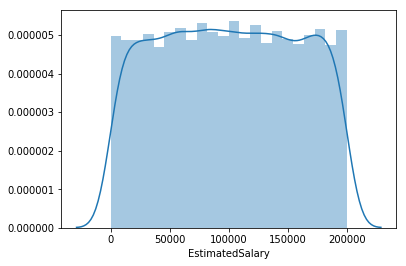

In [30]:
# Visualization of the Salary of customers
sns.distplot(data['EstimatedSalary'])

In [31]:
data['EstimatedSalary'].value_counts(bins=5)

(40007.76, 80003.94]               2033
(80003.94, 120000.12]              2029
(159996.3, 199992.48]              1994
(120000.12, 159996.3]              1989
(-188.40200000000002, 40007.76]    1955
Name: EstimatedSalary, dtype: int64

In [32]:
data['EstimatedSalary']=[ 0 if element >= 0 and element <40000 
                      else 1 if element >=40000  and element < 80000
                      else 2 if element >=80000 and element < 120000
                      else 3 if element >=120000 and element < 160000
                      else 4
                      for element in data['EstimatedSalary']]

## Relation of other variables

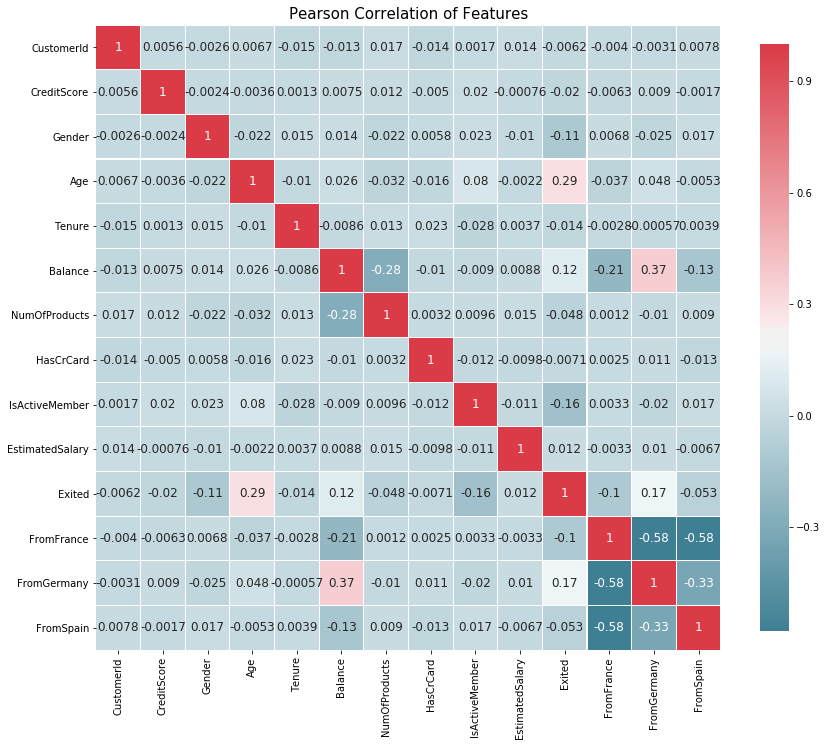

In [33]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

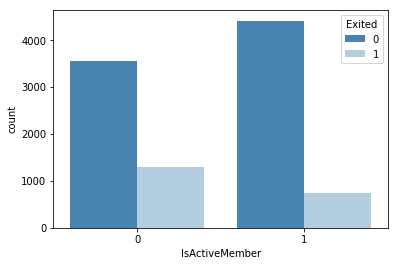

In [34]:
# Relation between Active Member and customers that leave
sns.countplot(data['IsActiveMember'],hue=data['Exited'],palette="Blues_r")

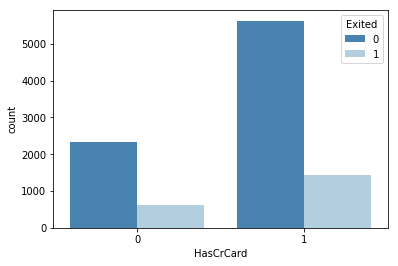

In [35]:
# Relation between customers with credit card and customers that leave
sns.countplot(data['HasCrCard'],hue=data['Exited'],palette="Blues_r")

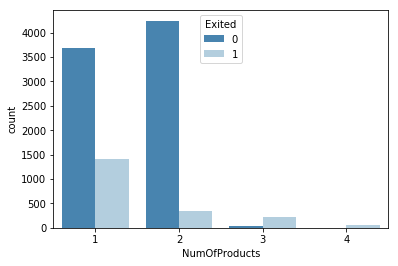

In [36]:
# Relation between the number of affiliated products per customer and customers that leave
sns.countplot(data['NumOfProducts'],hue=data['Exited'],palette="Blues_r")

# Creation of the Model

## Ridge regression 
Use to show the impact of each variable

In [37]:
from sklearn.linear_model import Ridge

In [38]:
data1=data.copy()

In [39]:
data1.drop(['CustomerId'], inplace = True, axis=1)

In [40]:
X = data1
Y = data1["Exited"]
X = X.drop("Exited", axis=1)

In [41]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
    
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.006 * X0 + -0.076 * X1 + 0.116 * X2 + -0.002 * X3 + 0.018 * X4 + -0.016 * X5 + -0.004 * X6 + -0.14 * X7 + 0.002 * X8 + -0.044 * X9 + 0.083 * X10 + -0.039 * X11


We can see that 2 variables don't have any impact (X3 and X8) we can drop theim, we try with and without theim and we have a better result without. 

In [42]:
data.drop(['Tenure','EstimatedSalary'], inplace = True, axis=1)

## Split Train/Test

In [43]:
X1 = data
Y1 = data["Exited"]
X1 = X1.drop("Exited", axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_training,X_test,Y_training,Y_test = train_test_split(X1,Y1, test_size = 0.20, random_state = 21)

In [45]:
X_training.shape,X_test.shape,Y_training.shape,Y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [46]:
Id_Customer=X_test['CustomerId']

In [47]:
X_training.drop(['CustomerId'], inplace = True, axis=1)
X_test.drop(['CustomerId'], inplace = True, axis=1)

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV

import time

/Users/vadimbenichou/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
## LOGISTIC REGRESSION ##

start_time = time.time()
logreg = LogisticRegression(penalty='l2',class_weight=None,solver='liblinear')
logreg.fit(X_training, Y_training)
Y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
print(acc_logreg)
time_logreg=time.time()-start_time
print("--- %s seconds ---" % (time_logreg))

81.15
--- 0.020520925521850586 seconds ---


In [50]:
## SVM ##

start_time = time.time()
svm = SVC()
svm.fit(X_training, Y_training)
Y_pred = svm.predict(X_test)
acc_svm = round(accuracy_score(Y_pred, Y_test) * 100, 2)
print(acc_svm)
time_svm=time.time()-start_time
print("--- %s seconds ---" % (time_svm))

85.0
--- 1.742082118988037 seconds ---


In [51]:
## KNN ##

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 9,weights='uniform',p=2)
knn.fit(X_training, Y_training)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
print(acc_knn)
time_knn=time.time()-start_time
print("--- %s seconds ---" % (time_knn))

83.2
--- 0.12106108665466309 seconds ---


In [52]:
## DECISION TREE ##

start_time = time.time()
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=None)
decision_tree.fit(X_training, Y_training)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_pred, Y_test) * 100, 2)
print(acc_decision_tree)
time_dtree=time.time()-start_time
print("--- %s seconds ---" % (time_dtree))

83.2
--- 0.014024972915649414 seconds ---


In [53]:
## RANDOM FOREST ##

start_time = time.time()
randomforest = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2)
randomforest.fit(X_training, Y_training)
Y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(Y_pred, Y_test) * 100, 2)
print(acc_randomforest)
time_randf=time.time()-start_time
print("--- %s seconds ---" % (time_randf))

82.8
--- 0.0814671516418457 seconds ---


In [54]:
# Summary of models with accuracies
models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Regression', 'Decision Tree','Random Forest'],
    'Score': [acc_svm, acc_knn, acc_logreg, acc_decision_tree, acc_randomforest],
    'Time (sec)' : [time_svm,time_knn,time_logreg,time_dtree,time_randf]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Time (sec)
0,SVM,85.00,1.742082
1,KNN,83.20,0.121061
3,Decision Tree,83.20,0.014025
4,Random Forest,82.80,0.081467
2,Regression,81.15,0.020521


#### Grid Search for the 2 best classifiers

In [55]:
## Realy long to execute 
## SVM 
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),
              'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}

svm_grid = GridSearchCV(svm, param_grid=parameters)
svm_grid.fit(X_training,Y_training)

print("accuracy:"+str(np.average(cross_val_score(svm_grid, X_training, Y_training, scoring='accuracy'))))

accuracy:0.8505000734623102


In [56]:
#KNN
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

knn_grid = GridSearchCV(knn, param_grid=parameters)
knn_grid.fit(X_training,Y_training)

print("accuracy:"+str(np.average(cross_val_score(knn_grid, X_training, Y_training, scoring='accuracy'))))

accuracy:0.8378761825814532


In [57]:
#Y_predfinal for the model with the highest accuracy 
Y_predfinal = svm.predict(X_test)

In [58]:
FINAL = pd.DataFrame({
       "Customer_Id": Id_Customer,
        "Exited": Y_predfinal.astype(int)
    })

Confusion Matrix with useful metrics (recall, F1, Roc) 

In [59]:
confusionMatrix = confusion_matrix(Y_test,Y_predfinal)
confusionMatrix

array([[1570,   30],
       [ 270,  130]])

In [60]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predfinal))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      1600
          1       0.81      0.33      0.46       400

avg / total       0.85      0.85      0.82      2000



In [61]:
roc = roc_auc_score(Y_test,Y_predfinal)
print(roc)

0.653125


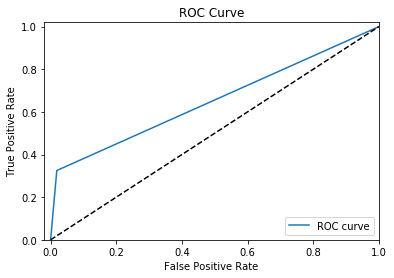

In [62]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_test, Y_predfinal)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
curve = plt.xlabel('False Positive Rate')
curve = plt.ylabel('True Positive Rate')
curve = plt.title('ROC Curve')
curve = plt.xlim([-0.02, 1])
curve = plt.ylim([0, 1.02])
curve = plt.legend(loc="lower right")

Hence, the best model is the SVM

In [63]:
Best_Model=svm